## WebScraping Project
> - AIM: To scrap data from website and Analyse and Visualize the Data in useful format

###### Scraping data From YallaMotor which is a used car selling website in SaudiArabia
###### URL =https://ksa.yallamotor.com/used-cars/search

In [2]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

import re

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

In [3]:
Name=[]
Price=[]
Details=[]
Time=[]
for i in range(2, 101):
    URL ='https://ksa.yallamotor.com/used-cars/search?page={}'.format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
  
    for cars in soup.find_all('div',attrs={'class' : 'row gutter-5 list-view'}):
    
        name = cars.find('div',attrs={'class':'pro-name'})
        if name is None:
            Name.append(np.NaN)
        else:
            Name.append(name.text)
            
        price = cars.find('span',attrs={'class' : 'pro-pice_pr'})
        if price is None:
            Price.append(np.NaN)
        else:
            Price.append(price.text)
            
        details = cars.find('ul',attrs={'class': 'features-list'})
        if details is None:
            Details.append(np.NaN)
        else:
            Details.append(details.text)

        time = cars.find('span',attrs={'class':'text-grey text-size-12 pull-left'})
        if time is None:
            Time.append(np.NaN)
        else:
            Time.append(time.text)

In [624]:
print(len(Name))
print(len(Price))
print(len(Details))
print(len(Time))

1683
1683
1683
1683


In [625]:
df = pd.DataFrame({'Name' : Name, 'Price' : Price, 'Details' : Details, 'Time' : Time})

In [626]:
df.head()

,Name,Price,Details,Time
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,\nNew Toyota Yaris 1.5L SE 2012\n,"14,000","\n375,335\nAutomatic\n2012\n","\nPosted on Apr 14, 2021 \n"
3,\nUsed Kia Sorento 3.5L Base 2015\n,"52,000","\n70,000\nAutomatic\n2015\n","\nPosted on Apr 14, 2021 \n"
4,\nUsed Kia Cadenza 3.3L GDi Mid 2017\n,"49,000","\n172,000\nAutomatic\n2017\n","\nUpdated on Apr 14, 2021 \n"


In [627]:
df.tail()

,Name,Price,Details,Time
1678,\nUsed Ford Edge 2017\n,"100,500","\n1,130\nAutomatic\n2017\n","\nUpdated on Feb 18, 2021 \n"
1679,\nUsed Ford Ranger 2011\n,"22,999","\n90,033\nManual\n2011\n","\nUpdated on Feb 18, 2021 \n"
1680,\nUsed Ford Expedition 2017\n,"142,999","\n1,218\nAutomatic\n2017\n","\nUpdated on Feb 18, 2021 \n"
1681,\nUsed Ford Edge 2017\n,"109,999",\n361\nAutomatic\n2017\n,"\nUpdated on Feb 18, 2021 \n"
1682,\nUsed Ford Mustang 2017\n,"156,000","\n7,796\nAutomatic\n2017\n","\nUpdated on Feb 18, 2021 \n"


In [628]:
df.shape

(1683, 4)

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1485 non-null   object
 1   Price    1485 non-null   object
 2   Details  1485 non-null   object
 3   Time     1485 non-null   object
dtypes: object(4)
memory usage: 52.7+ KB


In [630]:
df.to_csv('UsedCars.csv', index = False)

In [631]:
df.to_csv('temp.csv')

# RegEx
- Using Regular Expressions to add new coloums and clean the data

In [632]:
df = pd.read_csv("UsedCars.csv")
df.head()

,Name,Price,Details,Time
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,\nNew Toyota Yaris 1.5L SE 2012\n,"14,000","\n375,335\nAutomatic\n2012\n","\nPosted on Apr 14, 2021 \n"
3,\nUsed Kia Sorento 3.5L Base 2015\n,"52,000","\n70,000\nAutomatic\n2015\n","\nPosted on Apr 14, 2021 \n"
4,\nUsed Kia Cadenza 3.3L GDi Mid 2017\n,"49,000","\n172,000\nAutomatic\n2017\n","\nUpdated on Apr 14, 2021 \n"


In [633]:
#Creating new coloum for Km's Done from Details coloum

regex = r"[\d]+,[\d]+"

df['KM_Done'] = df['Details'].apply(lambda x : re.findall(regex, str(x)))

In [634]:
#Extracting Model Year from Details

regex = r"[\d][\d][\d][\d]"

df['Model_Year'] = df['Details'].apply(lambda x : re.findall(regex, str(x)))

In [635]:
regex = r"Used "

df['Name1'] = df['Name'].apply(lambda x : re.sub(regex,'',str(x)))

In [636]:
regex = r"^[A-z]+[\s]"

df['Manufacturer'] = df['Name1'].apply(lambda x : re.findall(regex,str(x)))

In [637]:
regex = r"^[A-z]+[\s]"

df['Model'] = df['Name1'].apply(lambda x : re.sub(regex,'',str(x)))

In [638]:
regex = r"^[A-z]+[\s]"

df['Model'] = df['Name1'].apply(lambda x : re.sub(regex,'',str(x)))

In [639]:
regex = r"^[A-z]+[\s]"

df['Model'] = df['Model'].apply(lambda x : re.findall(regex,str(x)))

In [640]:
regex = r"[A-z]+"

df['Transmission'] = df['Details'].apply(lambda x : re.findall(regex, str(x)))

In [641]:
#Removing the Name and Details coloum since we dont need it anymore

df.drop(['Name','Details'],
  axis='columns')

,Price,Time,KM_Done,Model_Year,Name1,Manufacturer,Model,Transmission
0,NaN,NaN,[],[],nan,[],[],[nan]
1,NaN,NaN,[],[],nan,[],[],[nan]
2,"14,000","\nPosted on Apr 14, 2021 \n","[375,335]",[2012],\nNew Toyota Yaris 1.5L SE 2012\n,[],[],[Automatic]
3,"52,000","\nPosted on Apr 14, 2021 \n","[70,000]",[2015],\nKia Sorento 3.5L Base 2015\n,[],[],[Automatic]
4,"49,000","\nUpdated on Apr 14, 2021 \n","[172,000]",[2017],\nKia Cadenza 3.3L GDi Mid 2017\n,[],[],[Automatic]
...,...,...,...,...,...,...,...,...
1678,"100,500","\nUpdated on Feb 18, 2021 \n","[1,130]",[2017],\nFord Edge 2017\n,[],[],[Automatic]
1679,"22,999","\nUpdated on Feb 18, 2021 \n","[90,033]",[2011],\nFord Ranger 2011\n,[],[],[Manual]
1680,"142,999","\nUpdated on Feb 18, 2021 \n","[1,218]",[2017],\nFord Expedition 2017\n,[],[],[Automatic]
1681,"109,999","\nUpdated on Feb 18, 2021 \n",[],[2017],\nFord Edge 2017\n,[],[],[Automatic]


In [642]:
#Changing the data entry from list to Str

df.KM_Done = df.KM_Done.apply(lambda x : ''.join(x))
df.Transmission = df.Transmission.apply(lambda x : ''.join(x))
df.Model_Year = df.Model_Year.apply(lambda x : ''.join(x))
df.Name1 = df.Name1.apply(lambda x : ''.join(x))

In [643]:
#Removing the , from price coloum (27,000) > (27000)

df.Price = df.Price.apply(lambda x:str(x).replace(',',''))

In [644]:
#Time coloum is saved as "Posted on 13 Feb 2018" we just want it to be "13 Feb 2018"

df.Time = df.Time.apply(lambda x: str(x).replace('\nPosted on ',''))
df.Time = df.Time.apply(lambda x: str(x).replace(' \n',''))

In [645]:
#Droping the first 2 nan value rows

df= df.drop(0)
df=df.drop(1)

In [646]:
#Changing the nan values of price to 0 (temporarily)

df.Price = df.Price.apply(lambda x: str(x).replace('nan','0'))

In [647]:
#Changing the dtype of price to int from string

df.Price = df.Price.apply(lambda x :int(x))

In [648]:

df.Name1 = df.Name1.apply(lambda x: str(x).replace('\n',''))

In [649]:
df=df.drop(['Name','Details'],
  axis='columns')

In [650]:
df.Time = df.Time.apply(lambda x: str(x).replace('\nUpdated on ',''))

In [651]:
regex = r"New "

df['Name1'] = df['Name1'].apply(lambda x : re.sub(regex,'',str(x)))

In [652]:
regex = r"^[A-z]+[\s]"

df['Manufacturer'] = df['Name1'].apply(lambda x : re.findall(regex,str(x)))

In [653]:
#Using RegEx to get the manufacturer and model coloum

regex = r"^[A-z]+[\s]"

df['Model'] = df['Name1'].apply(lambda x : re.sub(regex,'',str(x)))

regex = r"^[A-z]+[\s]"

df['Model'] = df['Name1'].apply(lambda x : re.sub(regex,'',str(x)))

regex = r"^[A-z]+[\s]"

df['Model'] = df['Model'].apply(lambda x : re.findall(regex,str(x)))

In [654]:
df.head()

,Price,Time,KM_Done,Model_Year,Name1,Manufacturer,Model,Transmission
2,14000,"Apr 14, 2021","375,335",2012,Toyota Yaris 1.5L SE 2012,[Toyota ],[Yaris ],Automatic
3,52000,"Apr 14, 2021","70,000",2015,Kia Sorento 3.5L Base 2015,[Kia ],[Sorento ],Automatic
4,49000,"Apr 14, 2021","172,000",2017,Kia Cadenza 3.3L GDi Mid 2017,[Kia ],[Cadenza ],Automatic
5,23000,"Apr 14, 2021","164,000",2014,Hyundai Elantra 2014,[Hyundai ],[Elantra ],Automatic
6,22000,"Apr 14, 2021","84,000",2015,Ford EcoSport 2015,[Ford ],[EcoSport ],Automatic


In [655]:
#Changing the data entry from list to Str

df.Manufacturer = df.Manufacturer.apply(lambda x : ''.join(x))
df.Model = df.Model.apply(lambda x : ''.join(x))
df.Transmission = df.Transmission.apply(lambda x : ''.join(x))

In [656]:
df.head()

,Price,Time,KM_Done,Model_Year,Name1,Manufacturer,Model,Transmission
2,14000,"Apr 14, 2021","375,335",2012,Toyota Yaris 1.5L SE 2012,Toyota,Yaris,Automatic
3,52000,"Apr 14, 2021","70,000",2015,Kia Sorento 3.5L Base 2015,Kia,Sorento,Automatic
4,49000,"Apr 14, 2021","172,000",2017,Kia Cadenza 3.3L GDi Mid 2017,Kia,Cadenza,Automatic
5,23000,"Apr 14, 2021","164,000",2014,Hyundai Elantra 2014,Hyundai,Elantra,Automatic
6,22000,"Apr 14, 2021","84,000",2015,Ford EcoSport 2015,Ford,EcoSport,Automatic


In [657]:
#Rearranging the coloums to make table look better

column_names = ["Name1","Manufacturer","Model","Model_Year","Transmission","KM_Done","Price","Time"]

df = df.reindex(columns=column_names)

In [658]:
df

,Name1,Manufacturer,Model,Model_Year,Transmission,KM_Done,Price,Time
2,Toyota Yaris 1.5L SE 2012,Toyota,Yaris,2012,Automatic,"375,335",14000,"Apr 14, 2021"
3,Kia Sorento 3.5L Base 2015,Kia,Sorento,2015,Automatic,"70,000",52000,"Apr 14, 2021"
4,Kia Cadenza 3.3L GDi Mid 2017,Kia,Cadenza,2017,Automatic,"172,000",49000,"Apr 14, 2021"
5,Hyundai Elantra 2014,Hyundai,Elantra,2014,Automatic,"164,000",23000,"Apr 14, 2021"
6,Ford EcoSport 2015,Ford,EcoSport,2015,Automatic,"84,000",22000,"Apr 14, 2021"
...,...,...,...,...,...,...,...,...
1678,Ford Edge 2017,Ford,Edge,2017,Automatic,"1,130",100500,"Feb 18, 2021"
1679,Ford Ranger 2011,Ford,Ranger,2011,Manual,"90,033",22999,"Feb 18, 2021"
1680,Ford Expedition 2017,Ford,Expedition,2017,Automatic,"1,218",142999,"Feb 18, 2021"
1681,Ford Edge 2017,Ford,Edge,2017,Automatic,,109999,"Feb 18, 2021"


In [659]:
df.to_csv('UsedCarsv2.csv', index = False)

In [660]:
df = pd.read_csv('UsedCarsv2.csv')

In [661]:
type(df['Model_Year'][2])

numpy.float64

In [662]:
#Removing all null values

df.dropna()

,Name1,Manufacturer,Model,Model_Year,Transmission,KM_Done,Price,Time
0,Toyota Yaris 1.5L SE 2012,Toyota,Yaris,2012.0,Automatic,"375,335",14000,"Apr 14, 2021"
1,Kia Sorento 3.5L Base 2015,Kia,Sorento,2015.0,Automatic,"70,000",52000,"Apr 14, 2021"
2,Kia Cadenza 3.3L GDi Mid 2017,Kia,Cadenza,2017.0,Automatic,"172,000",49000,"Apr 14, 2021"
3,Hyundai Elantra 2014,Hyundai,Elantra,2014.0,Automatic,"164,000",23000,"Apr 14, 2021"
4,Ford EcoSport 2015,Ford,EcoSport,2015.0,Automatic,"84,000",22000,"Apr 14, 2021"
...,...,...,...,...,...,...,...,...
1675,Ford Expedition 2015,Ford,Expedition,2015.0,Automatic,"92,823",73499,"Feb 18, 2021"
1676,Ford Edge 2017,Ford,Edge,2017.0,Automatic,"1,130",100500,"Feb 18, 2021"
1677,Ford Ranger 2011,Ford,Ranger,2011.0,Manual,"90,033",22999,"Feb 18, 2021"
1678,Ford Expedition 2017,Ford,Expedition,2017.0,Automatic,"1,218",142999,"Feb 18, 2021"


In [663]:
df.Model_Year.apply(lambda x: str(x).replace(' ','.'))

0       2012.0
1       2015.0
2       2017.0
3       2014.0
4       2015.0
         ...  
1676    2017.0
1677    2011.0
1678    2017.0
1679    2017.0
1680    2017.0
Name: Model_Year, Length: 1681, dtype: object

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name1         1485 non-null   object 
 1   Manufacturer  1475 non-null   object 
 2   Model         1390 non-null   object 
 3   Model_Year    1485 non-null   float64
 4   Transmission  1217 non-null   object 
 5   KM_Done       1374 non-null   object 
 6   Price         1681 non-null   int64  
 7   Time          1485 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 105.2+ KB


In [665]:
df['Model_Year']

0       2012.0
1       2015.0
2       2017.0
3       2014.0
4       2015.0
         ...  
1676    2017.0
1677    2011.0
1678    2017.0
1679    2017.0
1680    2017.0
Name: Model_Year, Length: 1681, dtype: float64

In [666]:
#Changing the Model Year to numeric format

df["Model_Year"] = pd.to_numeric(df["Model_Year"])

In [667]:
df.KM_Done = df.KM_Done.apply(lambda x:str(x).replace(',',''))

In [668]:
df

,Name1,Manufacturer,Model,Model_Year,Transmission,KM_Done,Price,Time
0,Toyota Yaris 1.5L SE 2012,Toyota,Yaris,2012.0,Automatic,375335,14000,"Apr 14, 2021"
1,Kia Sorento 3.5L Base 2015,Kia,Sorento,2015.0,Automatic,70000,52000,"Apr 14, 2021"
2,Kia Cadenza 3.3L GDi Mid 2017,Kia,Cadenza,2017.0,Automatic,172000,49000,"Apr 14, 2021"
3,Hyundai Elantra 2014,Hyundai,Elantra,2014.0,Automatic,164000,23000,"Apr 14, 2021"
4,Ford EcoSport 2015,Ford,EcoSport,2015.0,Automatic,84000,22000,"Apr 14, 2021"
...,...,...,...,...,...,...,...,...
1676,Ford Edge 2017,Ford,Edge,2017.0,Automatic,1130,100500,"Feb 18, 2021"
1677,Ford Ranger 2011,Ford,Ranger,2011.0,Manual,90033,22999,"Feb 18, 2021"
1678,Ford Expedition 2017,Ford,Expedition,2017.0,Automatic,1218,142999,"Feb 18, 2021"
1679,Ford Edge 2017,Ford,Edge,2017.0,Automatic,nan,109999,"Feb 18, 2021"


##### Now we need to perform Data Correction to handle few nan and NA values

# DataCorrection

In [669]:
df.Transmission=df.Transmission.apply(lambda x: str(df["Transmission"].mode()[0]).replace('nan','') if x=='nan' else x  )
df.Transmission=df.Transmission.apply(lambda x: str(df["Transmission"].mode()[0]).replace('NA','') if x=='NA' else x  )

In [670]:
for i in df['Transmission']:
    print(i)

Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
CVT
Automatic
Automatic
Automatic
nan
nan
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
nan
Manual
nan
nan
nan
CVT
nan
nan
nan
nan
nan
nan
Automatic
nan
nan
Manual
Automatic
Automatic
Manual
Automatic
CVT
Automatic
Automatic
Automatic
nan
nan
Automatic
Automatic
CVT
CVT
Automatic
Automatic
Automatic
Automatic
Automatic
Manual
Automatic
Automatic
Automatic
Automatic
Automatic
nan
nan
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
nan
nan
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
nan
nan
Automatic
Manual
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
Automatic
nan
nan

In [671]:
df.Manufacturer=df.Manufacturer.apply(lambda x: str(df["Manufacturer"].mode()[0]).replace('New ','') if x=='New ' else x  )

In [672]:
df.Manufacturer=df.Manufacturer.apply(lambda x: str(df["Manufacturer"].mode()[0]).replace('nan','') if x=='nan' else x  )

In [673]:
for i in df['Manufacturer']:
    print(i)

Toyota 
Kia 
Kia 
Hyundai 
Ford 
Mitsubishi 
Mitsubishi 
Kia 
Ford 
Jeep 
Jeep 
MG 
Toyota 
Hyundai 
Chevrolet 
nan
nan
Audi 
Ford 
Audi 
Kia 
Lexus 
Lexus 
Chevrolet 
GMC 
Toyota 
Toyota 
Hyundai 
Kia 
Honda 
Toyota 
Mitsubishi 
nan
nan
Mazda 
Chevrolet 
Ford 
nan
Chevrolet 
Hyundai 
Toyota 
GMC 
Ford 
Hummer 
MG 
Dodge 
Honda 
Volkswagen 
Chevrolet 
nan
nan
Chevrolet 
Hyundai 
Honda 
Honda 
Land 
Ford 
Toyota 
Chevrolet 
Dodge 
Toyota 
Dodge 
Ford 
Ford 
Ford 
Ford 
nan
nan
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
nan
nan
Ford 
Ford 
Ford 
Lincoln 
Lincoln 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Cadillac 
Cadillac 
nan
nan
Ford 
Ford 
Ford 
Ford 
Ford 
Toyota 
Ford 
Toyota 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
nan
nan
Ford 
Toyota 
Toyota 
Toyota 
Toyota 
Ford 
Ford 
Ford 
Ford 
Ford 
Lincoln 
Lincoln 
Ford 
Ford 
Ford 
nan
nan
Ford 
Ford 
Toyota 
Ford 
Ford 
Lincoln 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 
Ford 


In [674]:
df.KM_Done=df.KM_Done.apply(lambda x: str(df["KM_Done"].mode()[0]).replace('nan','') if x=='nan' else x  )
df["KM_Done"] = pd.to_numeric(df["KM_Done"])

In [675]:
df = df.dropna()

In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1680
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name1         1054 non-null   object 
 1   Manufacturer  1054 non-null   object 
 2   Model         1054 non-null   object 
 3   Model_Year    1054 non-null   float64
 4   Transmission  1054 non-null   object 
 5   KM_Done       1054 non-null   float64
 6   Price         1054 non-null   int64  
 7   Time          1054 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 74.1+ KB


#### Algorithm
- To calculate the cost per remaning Km's of car
- After computing the cost we give a rating of either 1 or 5 or 10
- With 10 being the best value for money buy for the customer and 1 least value for money

In [677]:
#Source : https://www.caranddriver.com/research/a32758625/how-many-miles-does-a-car-last/
exp_life = 321868

In [678]:
#Formula found from google search
for i in df['Price']:
    pprk = (df['Price']/(exp_life-df['KM_Done']))
    # pprk -> Price Per Remaning KM
    pprk = pprk*100
    pprk = pprk.astype(int)
    print(pprk)

0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
16

0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
16

Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    

Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    

0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
16

0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
16

Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    

0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
16

0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
1680    49
Length: 1054, dtype: int32
0      -26
1       20
2       32
3       14
4        9
        ..
1675    32
1676    31
1677     9
1678    44
16

In [679]:
max(pprk.astype(int))

1816

In [680]:
pprk.describe()

count    1054.000000
mean       24.182163
std       247.595807
min     -7508.000000
25%        15.000000
50%        23.000000
75%        33.000000
max      1816.000000
dtype: float64

In [681]:
b=[]
for i in pprk:
    if(i in range(-7508,20)):
        a = 10
    elif(i in range(20,30)):
        a = 5
    elif(i in range(30,1816)):
        a = 1
    else:
        pass
    b.append(a)
print(b)


[10, 5, 1, 10, 10, 5, 5, 5, 1, 5, 5, 5, 10, 10, 10, 10, 1, 5, 10, 1, 1, 5, 10, 1, 1, 5, 1, 10, 1, 10, 10, 5, 10, 10, 5, 10, 1, 10, 10, 1, 10, 5, 5, 5, 10, 10, 10, 10, 5, 1, 5, 5, 5, 10, 5, 10, 10, 10, 5, 10, 10, 5, 5, 5, 5, 1, 5, 5, 5, 10, 10, 1, 1, 10, 1, 5, 10, 1, 10, 5, 1, 10, 5, 1, 10, 10, 5, 10, 1, 5, 10, 1, 1, 1, 10, 10, 10, 10, 1, 10, 1, 1, 5, 5, 10, 1, 1, 1, 1, 10, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 10, 1, 10, 5, 5, 1, 5, 1, 5, 10, 5, 10, 5, 5, 5, 5, 5, 5, 1, 5, 1, 10, 10, 5, 5, 5, 10, 10, 10, 10, 5, 1, 5, 5, 5, 10, 5, 10, 10, 10, 5, 10, 10, 5, 5, 5, 5, 1, 5, 5, 5, 10, 10, 10, 1, 5, 10, 10, 5, 1, 10, 5, 1, 10, 10, 5, 10, 5, 10, 1, 1, 1, 10, 10, 10, 10, 1, 10, 1, 1, 5, 5, 10, 1, 1, 1, 1, 10, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 10, 1, 10, 5, 5, 1, 5, 1, 5, 10, 5, 10, 5, 5, 5, 5, 1, 5, 1, 10, 10, 5, 10, 10, 1, 5, 5, 5, 10, 10, 5, 10, 10, 10, 10, 1, 1, 1, 10, 10, 5, 1, 5, 10, 1, 10, 5, 10, 1, 10, 10, 10, 5, 1, 10, 10, 1, 10, 10, 5, 1, 1, 10, 1, 1, 1, 1, 1, 10, 1, 1, 1, 5, 10

In [682]:
df['Rating'] = b

<ipython-input-682-da85bb44c70d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = b


In [683]:
df.head()

,Name1,Manufacturer,Model,Model_Year,Transmission,KM_Done,Price,Time,Rating
0,Toyota Yaris 1.5L SE 2012,Toyota,Yaris,2012.0,Automatic,375335.0,14000,"Apr 14, 2021",10
1,Kia Sorento 3.5L Base 2015,Kia,Sorento,2015.0,Automatic,70000.0,52000,"Apr 14, 2021",5
2,Kia Cadenza 3.3L GDi Mid 2017,Kia,Cadenza,2017.0,Automatic,172000.0,49000,"Apr 14, 2021",1
3,Hyundai Elantra 2014,Hyundai,Elantra,2014.0,Automatic,164000.0,23000,"Apr 14, 2021",10
4,Ford EcoSport 2015,Ford,EcoSport,2015.0,Automatic,84000.0,22000,"Apr 14, 2021",10


In [684]:
df = df.loc[(df["Manufacturer"] != 'Bentley ')]

In [685]:
df = df.loc[(df["Model"] != 'Pathfinder ')]

# DataVisualization

##### UniVariate Graph

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


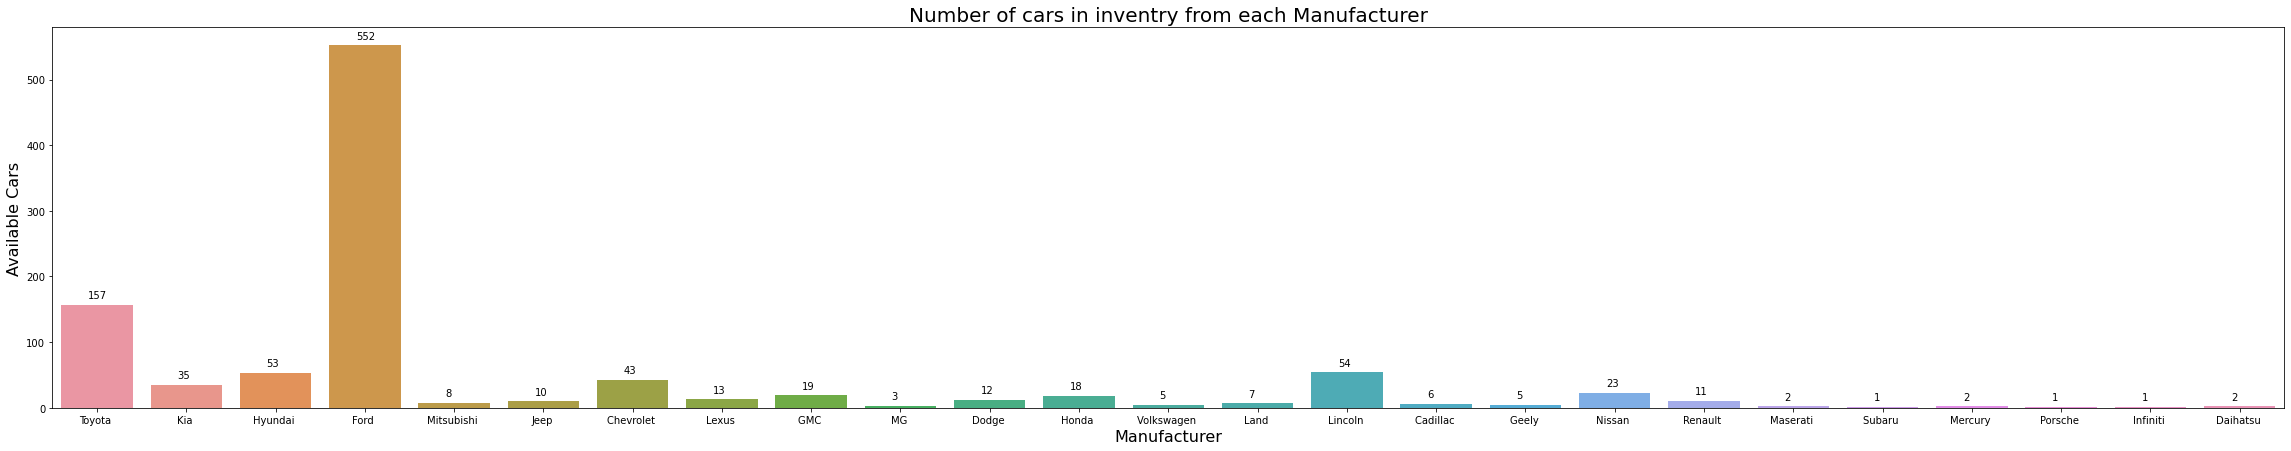

In [686]:
plt.figure(figsize=(40, 7))
ax = sns.countplot(df.Manufacturer)
plt.xlabel('Manufacturer',fontsize=16)
plt.ylabel('Available Cars',fontsize=16)
plt.title('Number of cars in inventry from each Manufacturer',fontsize=20)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

### Observations
- Here we get an insight about how many cars are present in the sellers inventory
- We can also see the different manufacturer cars that are available for sale
- The seller seems to have a large number of cars from Ford followed by Toyota and so on.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


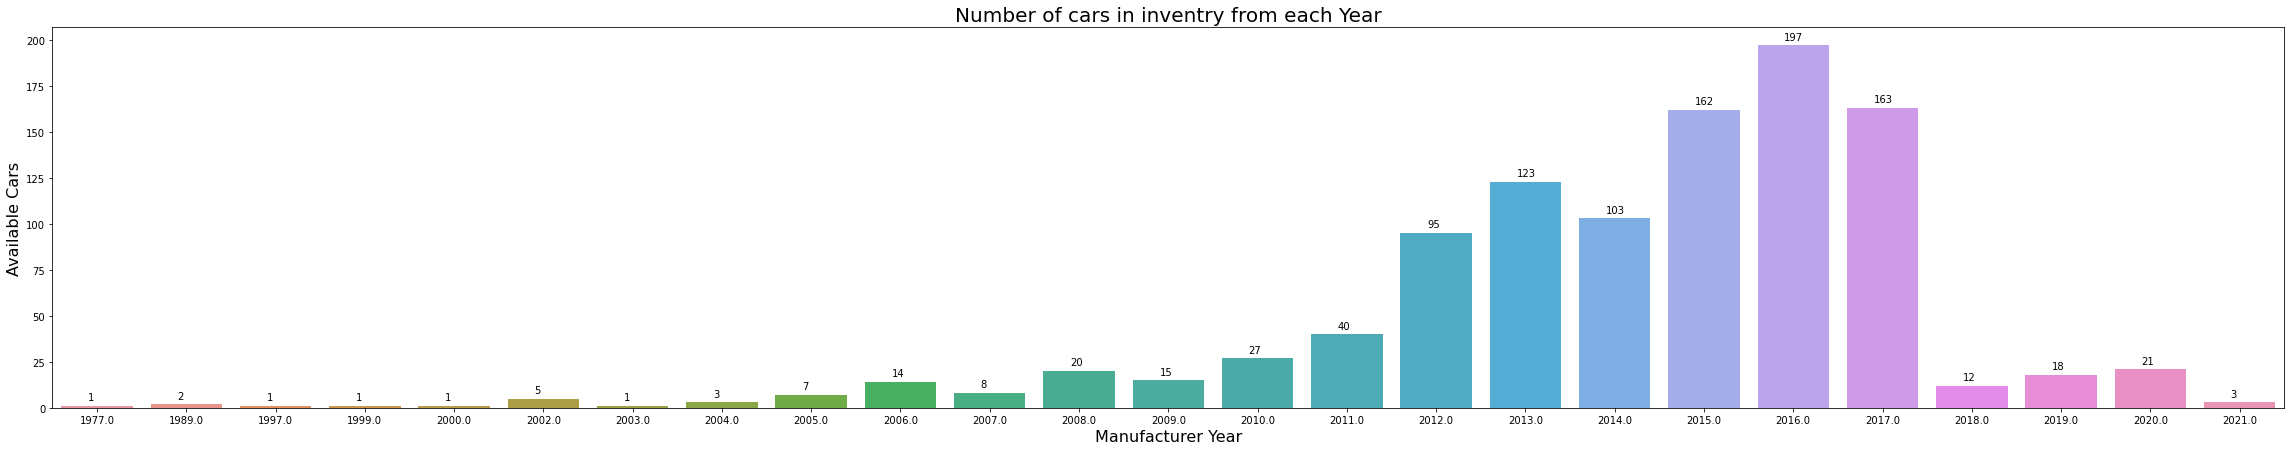

In [725]:
plt.figure(figsize=(40, 7))
ax = sns.countplot(df.Model_Year)
plt.xlabel('Manufacturer Year',fontsize=16)
plt.ylabel('Available Cars',fontsize=16)
plt.title('Number of cars in inventry from each Year',fontsize=20)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+3))
plt.show()

#### Observation
- There are more number of cars that were manufactured in the year 2016 followed by 2017 and 2015
- There are cars in inventory that were manufactured as long back as between 1977 and 2005

##### BiVariate Graph

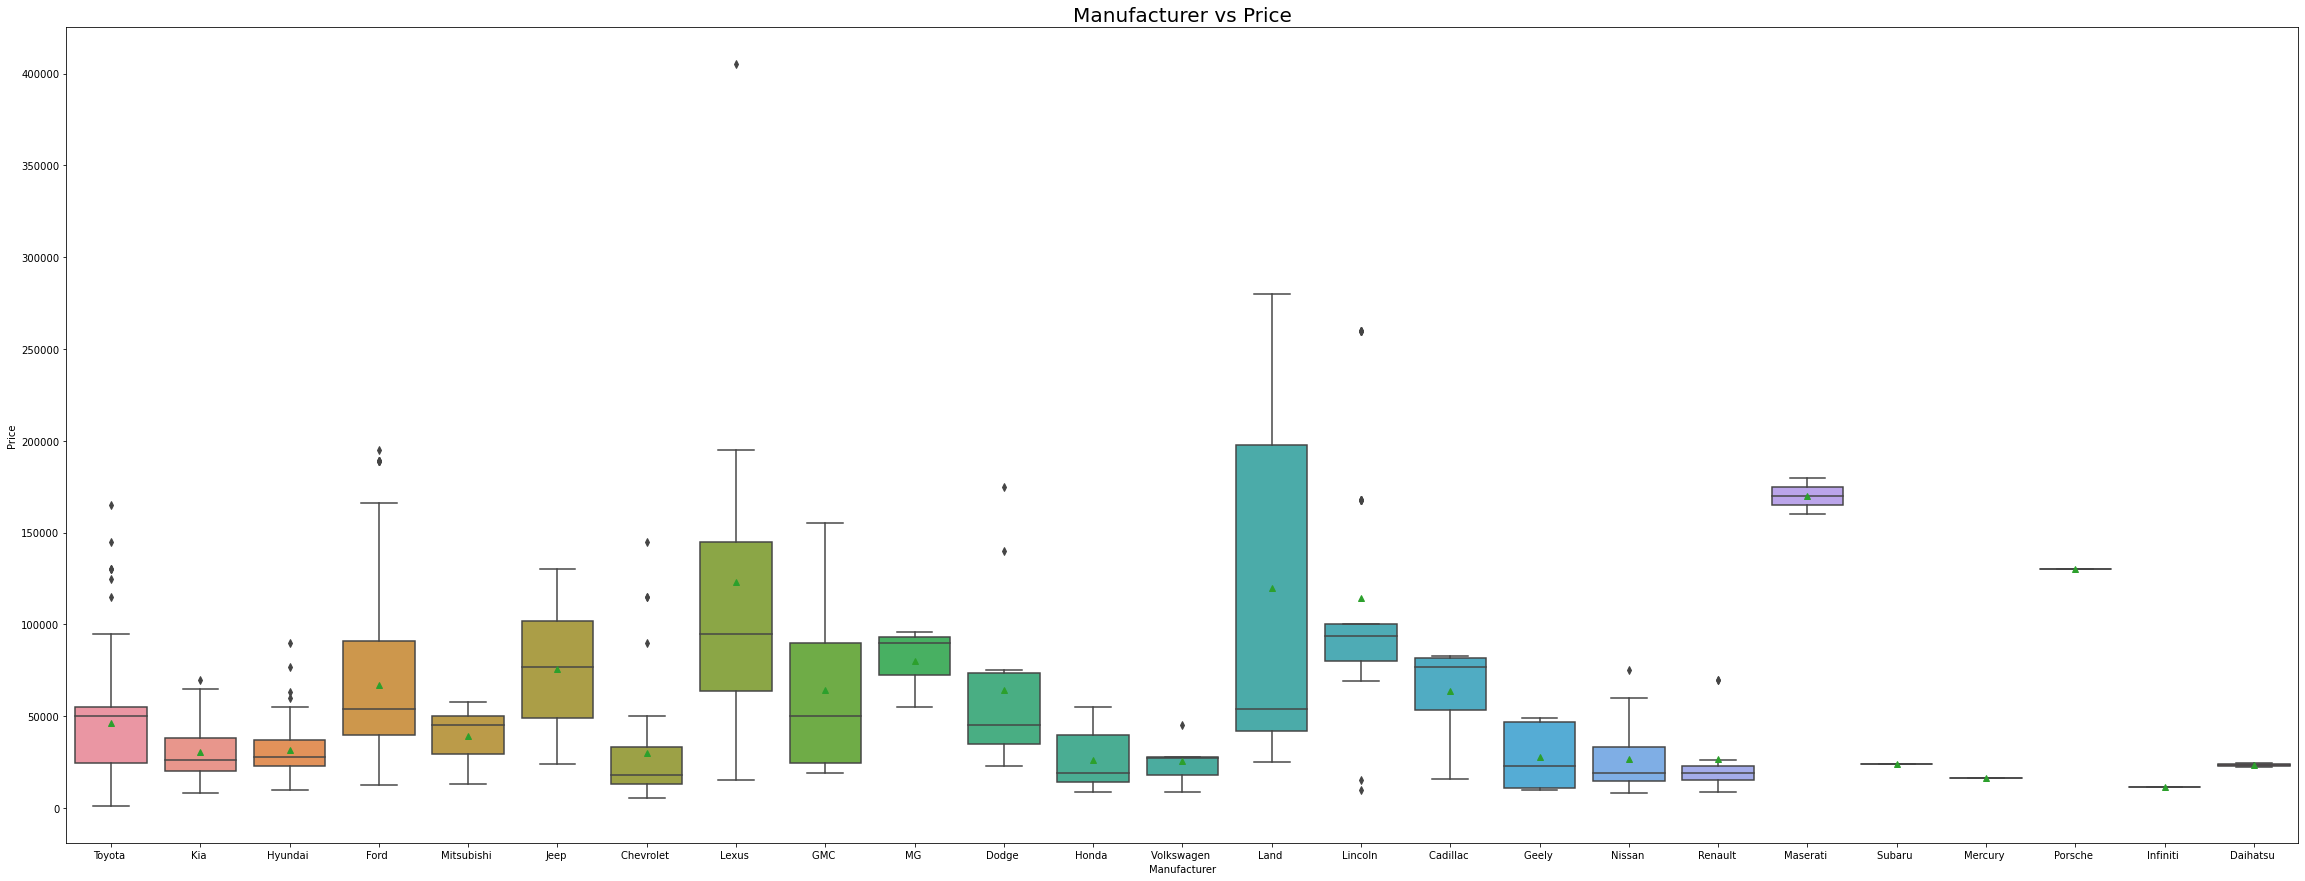

In [687]:
plt.figure(figsize=(40, 15))
sns.boxplot(x = df.Manufacturer, y = df.Price,showmeans=True)#,sym=''
plt.title('Manufacturer vs Price',fontsize=20)
plt.show()

##### Observation
- We can see in this graph how the prices varies acourding to different manufacturers
- We see that few Manufacturers have a very wide spread of price like Bently
- Manufacurers like Toyota have many outliers
- Where as Nissan has a very high value outlier in price

In [688]:
# plt.figure(figsize=(40, 7))
# ax = df.groupby(['Manufacturer','Model'])['Price'].mean().plot(kind = 'bar')
# plt.xlabel('Car',fontsize=16)
# plt.ylabel('Price',fontsize=16)
# plt.title('Avg Price of a Car',fontsize=20)
# plt.show()

<!-- ##### Observation
- We have the average of each car by model and manufacture here
- The average price of Bently cars are very high and thus these are expensive cars -->

In [689]:
# plt.figure(figsize=(40, 7))
# df.groupby(['Manufacturer','Model'])['Price'].max().plot(kind = 'bar')
# plt.xlabel('Car',fontsize=16)
# plt.ylabel('Price',fontsize=16)
# plt.title('Maximum Price of a Car',fontsize=20)
# plt.show()

In [690]:
# plt.figure(figsize=(40, 7))
# df.groupby(['Manufacturer','Model'])['Price'].min().plot(kind = 'bar')
# plt.xlabel('Car',fontsize=16)
# plt.ylabel('Price',fontsize=16)
# plt.title('Minimum Price of a Car',fontsize=20)
# plt.show()

In [691]:
# plt.figure(figsize=(40, 7))
# df.groupby(['Manufacturer','Model'])['KM_Done'].min().plot(kind = 'bar')
# plt.xlabel('Car',fontsize=16)
# plt.ylabel('KM Done' ,fontsize=16)
# plt.title('Least KM done by a Car',fontsize=20)
# plt.show()

In [692]:
# plt.figure(figsize=(40, 7))
# df.groupby(['Manufacturer','Model'])['KM_Done'].max().plot(kind = 'bar')
# plt.xlabel('Car',fontsize=16)
# plt.ylabel('KM Done' ,fontsize=16)
# plt.title('Maximim KM done by a Car',fontsize=20)
# plt.show()

In [693]:
# plt.figure(figsize=(40, 7))
# df.groupby(['Manufacturer','Model'])['KM_Done'].mean().plot(kind = 'bar')
# plt.xlabel('Car',fontsize=16)
# plt.ylabel('KM Done' ,fontsize=16)
# plt.title('Avg KM done by a Car',fontsize=20)
# plt.show()

In [694]:
# plt.figure(figsize=(100, 5))
# df.groupby(['Model_Year','Manufacturer','Model'])['Price'].mean().plot(kind = 'bar')
# plt.xlabel('Car',fontsize=16)
# plt.ylabel('Price' ,fontsize=16)
# plt.title('Avg Price of Each car by model year',fontsize=20)
# plt.show()

<Figure size 2880x504 with 0 Axes>

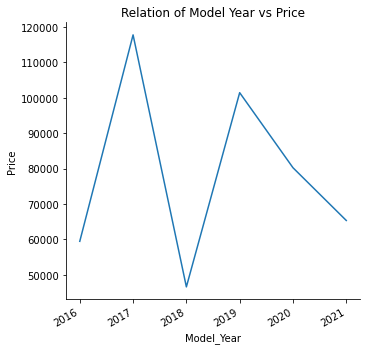

In [695]:
plt.figure(figsize=(40,7))
g = sns.relplot(x="Model_Year", y="Price", kind="line",ci=None, data=df[df.Model_Year>2015])
g.fig.autofmt_xdate()
plt.title("Relation of Model Year vs Price")
plt.show()

###### Observation
- We can see here how the mean price of cars  have varied through the years
- The Prices increases as from 2016 to 2017
- Then the prices of the cars from 2018 model suddenly drop to less than 50,000
- And the prices again increases from 2018 to 2019 and then decrease again from 2019 to 2021

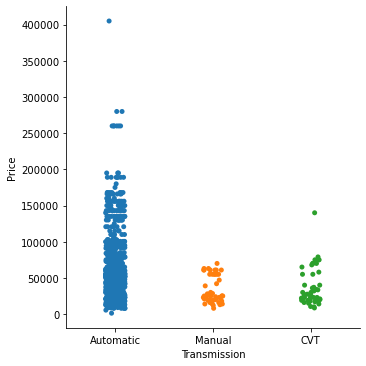

In [696]:
sns.catplot(x='Transmission',y='Price',data=df)

##### Observation
- This graph shows us how the various prices are distributed for each type of transmission
- The price of an Automatic is relatively high for some compared to Manual and CVT
- Majority of the Transmission type is of Automatic in the cars pesent in the inventory

#### MultiVariate

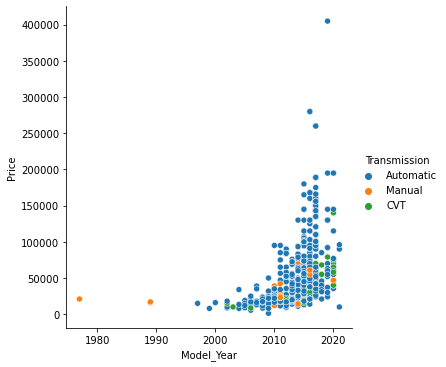

In [697]:
sns.relplot(x=df['Model_Year'],y=df['Price'],hue=df['Transmission'],data=df)
plt.show()

##### Observation
- As the Model Year increases the price also increases of the car
- From this graph we can see that we can get a CVT or Manual or Automatic of the newer year for less price than some of the older ones

In [698]:
# plt.figure(figsize=(100, 5))
# df.groupby(['Model_Year','Manufacturer','Model'])['Rating'].max().plot(kind = 'bar')
# plt.xlabel('Car',fontsize=16)
# plt.ylabel('Rating' ,fontsize=16)
# plt.title('Rating Of Car(Higher The Better)',fontsize=20)
# plt.show()

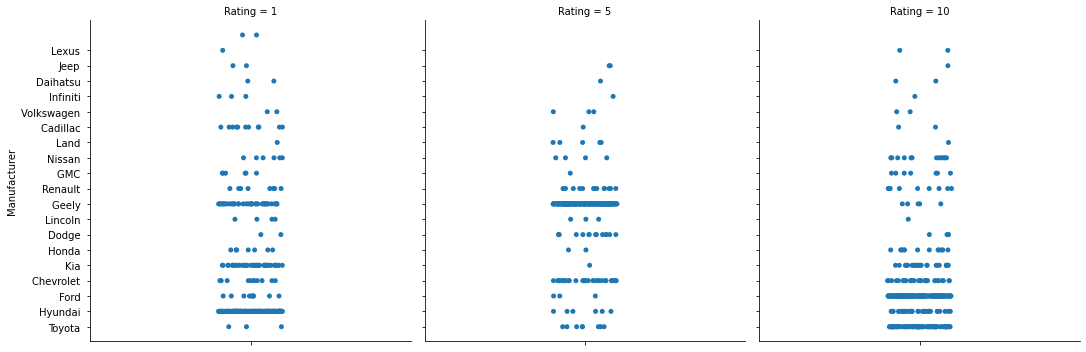

In [699]:
sns.catplot(y='Manufacturer',col='Rating',data=df)

##### Observation
- Toyota has more cars with rating of 10 and less of 1 which is a good deal for a buyer to consider that Manufacturer
- Ford also has some good Value for Money cars that the customer can consider
- The Manufacturer that one should avoid is Geely as they have very few cars with rating of 10 and more of rating 1 & 5

### We are now taking only the cars with Rating of 10 and performing  Analysis  on them

In [700]:
sample_data = df[df['Rating']== 10]

In [701]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 1677
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name1         411 non-null    object 
 1   Manufacturer  411 non-null    object 
 2   Model         411 non-null    object 
 3   Model_Year    411 non-null    float64
 4   Transmission  411 non-null    object 
 5   KM_Done       411 non-null    float64
 6   Price         411 non-null    int64  
 7   Time          411 non-null    object 
 8   Rating        411 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 32.1+ KB


In [702]:
sample_data.to_csv('Good_Rating.csv', index = False)

In [703]:
sample_data = pd.read_csv('Good_Rating.csv')

In [704]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name1         411 non-null    object 
 1   Manufacturer  411 non-null    object 
 2   Model         411 non-null    object 
 3   Model_Year    411 non-null    float64
 4   Transmission  411 non-null    object 
 5   KM_Done       411 non-null    float64
 6   Price         411 non-null    int64  
 7   Time          411 non-null    object 
 8   Rating        411 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 29.0+ KB


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


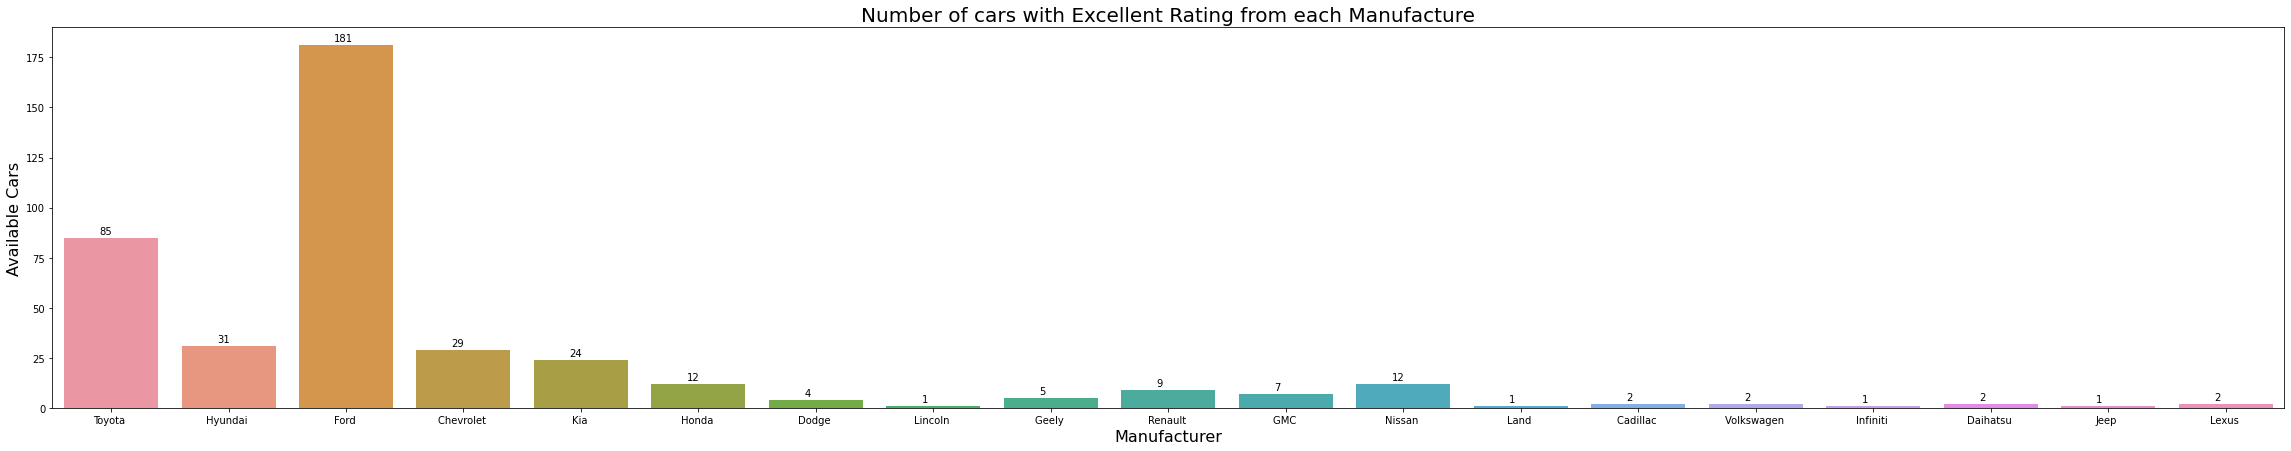

In [705]:
plt.figure(figsize=(40, 7))
ax = sns.countplot(sample_data.Manufacturer)
plt.xlabel('Manufacturer',fontsize=16)
plt.ylabel('Available Cars',fontsize=16)
plt.title('Number of cars with Excellent Rating from each Manufacture',fontsize=20)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))
plt.show()

#### Observation
- Here we see that Ford has the maximum number of cars with Rating = 10
- Toyota is second followed by Hyundai

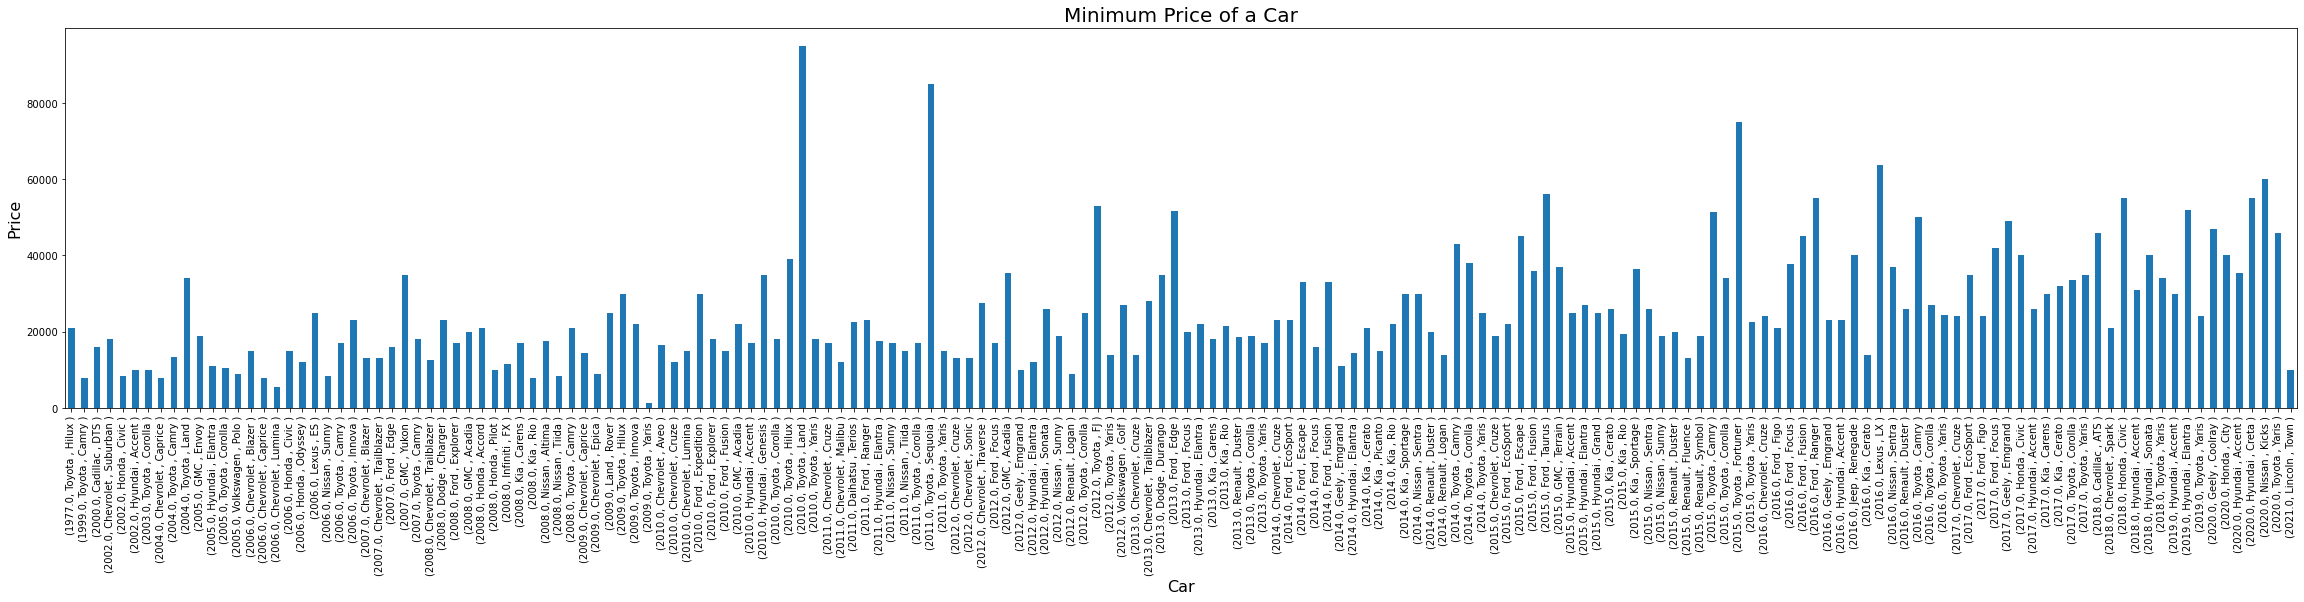

In [706]:
plt.figure(figsize=(40, 7))
sample_data.groupby(['Model_Year','Manufacturer','Model'])['Price'].min().plot(kind = 'bar')
plt.xlabel('Car',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.title('Minimum Price of a Car',fontsize=20)
plt.show()

##### Observation
- From this graph we can find out which car is the cheapest with rating of 10

##### We now analyse the data for cars that have Model Year above 2018 

In [707]:
sample_data2 = df[df['Model_Year'] > 2018]

In [708]:
sample_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 12 to 1395
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name1         42 non-null     object 
 1   Manufacturer  42 non-null     object 
 2   Model         42 non-null     object 
 3   Model_Year    42 non-null     float64
 4   Transmission  42 non-null     object 
 5   KM_Done       42 non-null     float64
 6   Price         42 non-null     int64  
 7   Time          42 non-null     object 
 8   Rating        42 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.3+ KB


In [709]:
sample_data2.to_csv('Year_above_2018.csv', index = False)

In [710]:
sample_data2 = pd.read_csv('Year_above_2018.csv')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


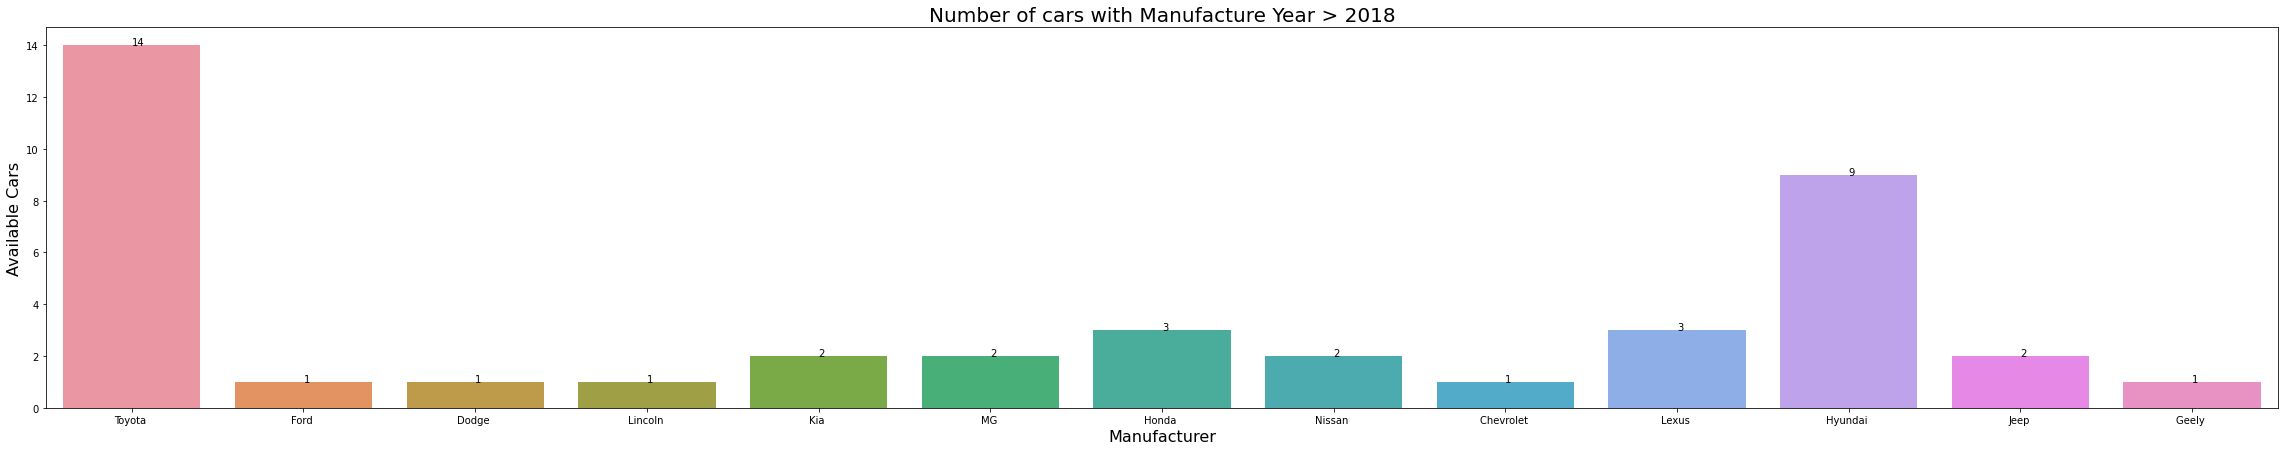

In [711]:
plt.figure(figsize=(40, 7))
ax = sns.countplot(sample_data2.Manufacturer)
plt.xlabel('Manufacturer',fontsize=16)
plt.ylabel('Available Cars',fontsize=16)
plt.title('Number of cars with Manufacture Year > 2018',fontsize=20)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()))
plt.show()

##### Observation
- We see that Toyota hae the highest number of cars in the inventory with Manufacture year > 2018 followed by Hyundai
- If the buyers is looking for cars that are relatively new they should consider buying from Toyota or Hyundai as they can choose from larger variety comparatively

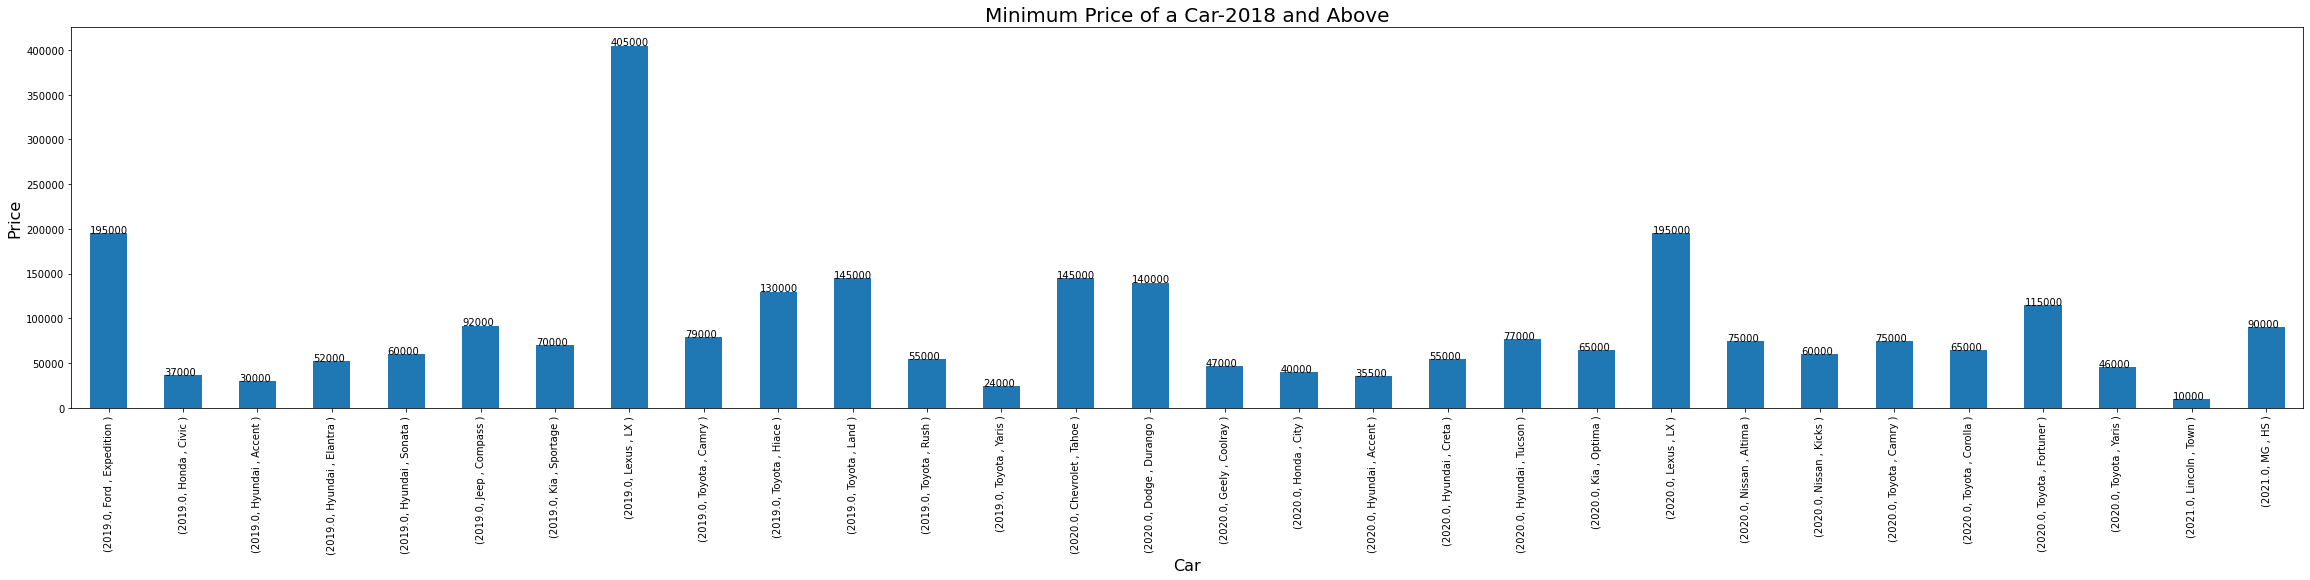

In [712]:
plt.figure(figsize=(40, 7))
ax = sample_data2.groupby(['Model_Year','Manufacturer','Model'])['Price'].min().plot(kind = 'bar')
plt.xlabel('Car',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.title('Minimum Price of a Car-2018 and Above',fontsize=20)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

#### Observation
- We find that in the inventory Manufacturer like Toyota and Hyundai Have the lest price for Manufacturer Year > 2018

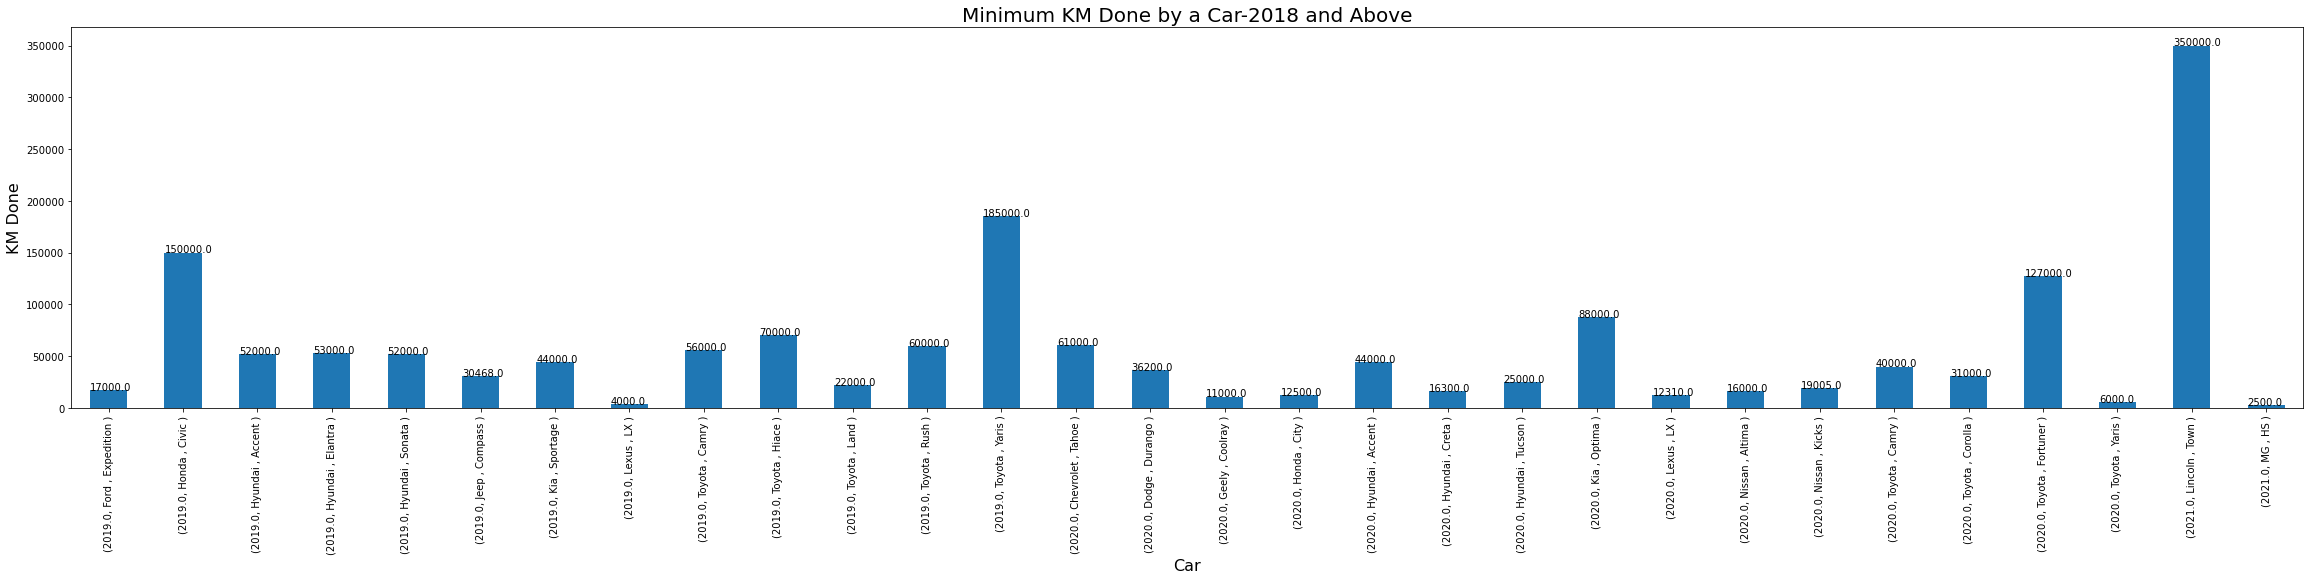

In [713]:
plt.figure(figsize=(40, 7))
ax = sample_data2.groupby(['Model_Year','Manufacturer','Model'])['KM_Done'].min().plot(kind = 'bar')
plt.xlabel('Car',fontsize=16)
plt.ylabel('KM Done',fontsize=16)
plt.title('Minimum KM Done by a Car-2018 and Above',fontsize=20)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

#### Observation
- This graph shows the lest number of KM done by each car with Manufacture Year > 2018

<Figure size 2880x504 with 0 Axes>

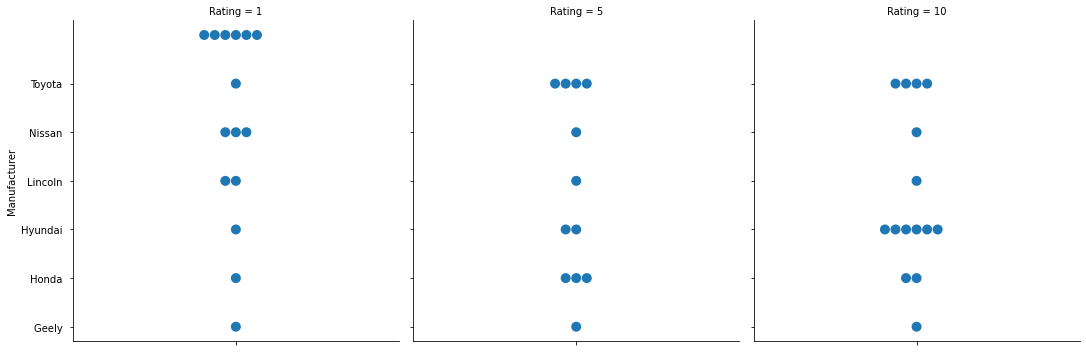

In [714]:
plt.figure(figsize=(40, 7))
sns.catplot(y='Manufacturer',col='Rating',s=10,kind='swarm',data=sample_data2)
plt.show()

#### Observation
- Manufactrers like Hyundai and Toyota have more number of cars with better rating and least in bad rating comparatively to other manufactrers 

### Now we filter the data and take top 3 manufacturers(Ford , Hyundai , Toyota) with rating = 10

In [715]:
sample_data3 = sample_data[sample_data.Manufacturer.isin(['Ford ','Toyota ','Hyundai '])]

In [716]:
sample_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 410
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name1         297 non-null    object 
 1   Manufacturer  297 non-null    object 
 2   Model         297 non-null    object 
 3   Model_Year    297 non-null    float64
 4   Transmission  297 non-null    object 
 5   KM_Done       297 non-null    float64
 6   Price         297 non-null    int64  
 7   Time          297 non-null    object 
 8   Rating        297 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 23.2+ KB


In [717]:
sample_data3.to_csv('Top3_Manufacturers.csv', index = False)

In [718]:
sample_data3 = pd.read_csv('Top3_Manufacturers.csv')

In [719]:
from ipywidgets import interactive
def size(height=2.5,aspect=1):
    sns.pairplot(sample_data3,height=height,aspect=aspect,hue='Manufacturer',markers=['o','s','D'],vars=['Price','KM_Done','Model_Year'])

In [720]:
interactive(size, height=(1,3.5,0.5),aspect=(0.5,2,0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

#### Observation
- We can see how the three manufacturers have different cars with varying KM , Price and Model Year
- Ford seems to be with the huge number of cars in variuos price ranges
- Toyota have some of the most expensive price as comparatively despite having done more KM
- Hyundai seems to have some of the cheapest cars for the Avg KM done.

## Conclusion

We have seen different graphs comparing different manufacturers to get insights into how the different manufacturers are performing in used cars business

After some Analysis it became clear that Ford have the most number of cars in Used cars business

Manufacturers like Toyota , Hyundai and Ford should be prefered over others as they have better variety of cars across all price range

There are more automatic cars in the inventory than manual or CVT

Chevrolet have some of the cheapest cars comparatively